In [1]:
%conda install -c conda-forge shap
%conda update -n base -c conda-forge conda

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import shap ##builtin datasets

X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
feature_names = list(X.columns)
feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.649170,87.303833,40.437454,36.718866
std,13.640442,1.455960,2.572562,1.506222,4.228857,1.758232,0.848806,0.470506,7385.911621,403.014771,12.347933,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


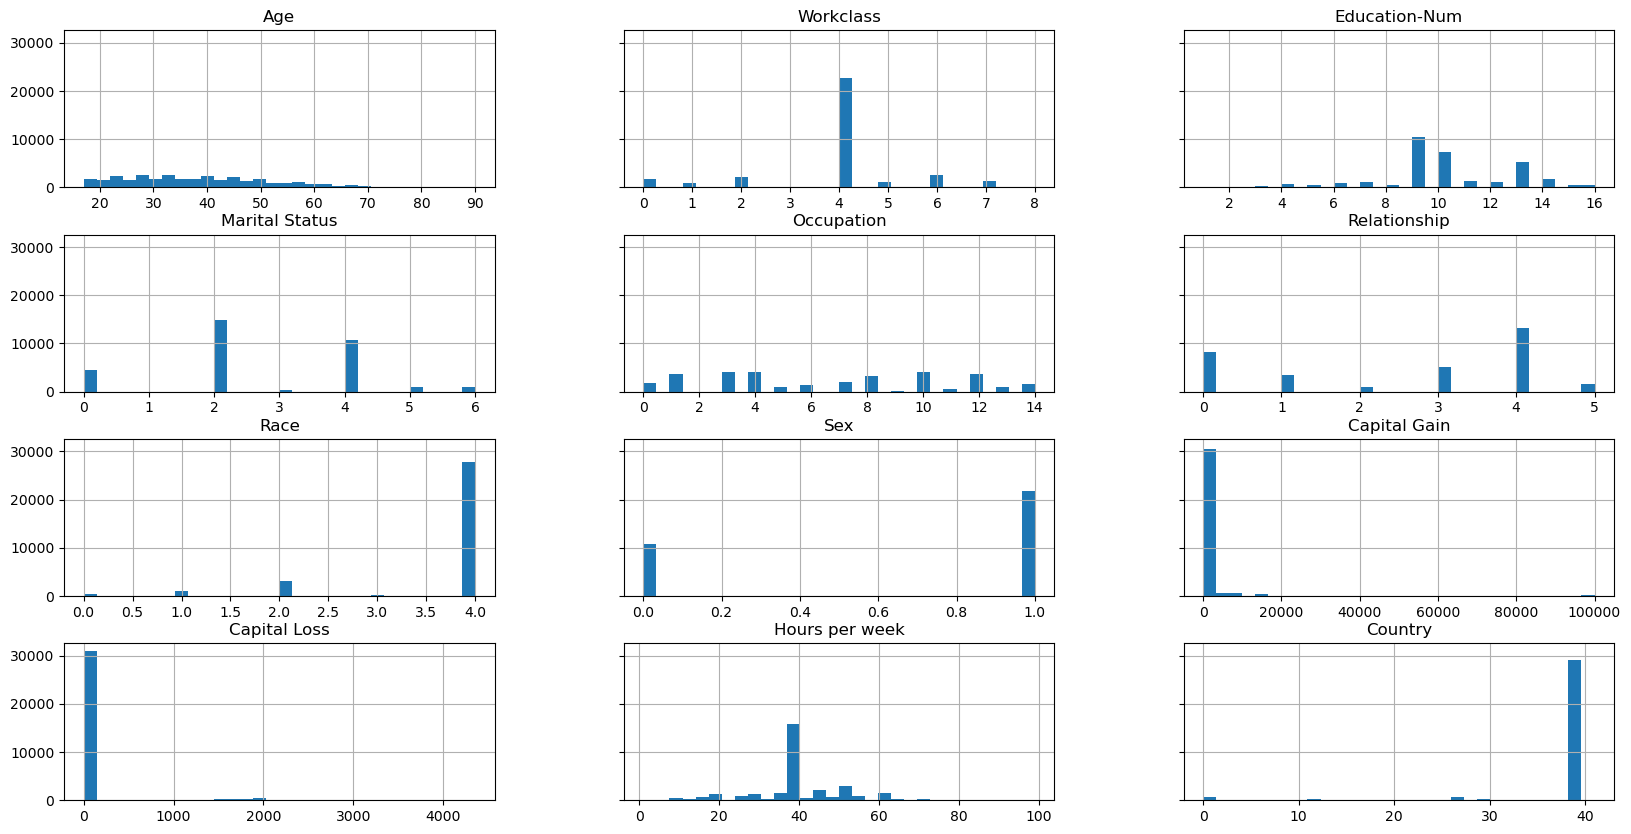

In [3]:
display(X.describe())
hist = X.hist(bins = 30, sharey = True,figsize = (20,10))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_display = X_display.loc[X_train.index]

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_train_display = X_display.loc[X_train.index]
X_val_display = X_display.loc[X_val.index]

In [6]:
import pandas as pd
train = pd.concat([pd.Series(y_train, index=X_train.index, name='Income>50K',dtype=int), X_train],axis=1)

validation = pd.concat([pd.Series(y_val, index=X_val.index, name='Income>50K',dtype=int), X_val],axis=1)

test = pd.concat([pd.Series(y_test, index=X_test.index, name='Income>50K',dtype=int), X_test],axis=1)

In [7]:
train

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
10911,1,47.0,4,9.0,2,3,4,4,1,0.0,0.0,40.0,39
17852,0,31.0,4,13.0,2,7,4,3,1,0.0,0.0,36.0,26
29165,1,32.0,4,10.0,2,13,5,4,0,0.0,0.0,32.0,39
30287,0,58.0,4,9.0,2,3,4,2,1,0.0,0.0,40.0,39
24019,0,17.0,4,6.0,4,6,3,4,1,0.0,0.0,20.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,0,43.0,4,8.0,2,14,4,4,1,0.0,0.0,40.0,39
6452,0,26.0,4,9.0,4,7,0,4,1,0.0,0.0,52.0,39
31352,0,32.0,7,14.0,2,10,4,4,1,0.0,0.0,50.0,39
6575,0,45.0,4,9.0,4,6,0,4,1,0.0,0.0,40.0,39


In [8]:
test

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
9646,0,62.0,6,4.0,6,8,0,4,0,0.0,0.0,66.0,39
709,0,18.0,4,7.0,4,8,2,4,1,0.0,0.0,25.0,39
7385,1,25.0,4,13.0,4,5,3,4,1,27828.0,0.0,50.0,39
16671,0,33.0,4,9.0,2,10,4,4,1,0.0,0.0,40.0,39
21932,0,36.0,4,7.0,4,7,1,4,0,0.0,0.0,40.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,1,39.0,4,13.0,2,10,5,4,0,0.0,0.0,20.0,39
25723,0,17.0,4,6.0,4,12,3,4,0,0.0,0.0,20.0,39
29514,0,35.0,4,9.0,4,14,3,4,1,0.0,0.0,40.0,39
1600,0,30.0,4,7.0,2,3,4,4,1,0.0,0.0,45.0,39


In [9]:
## la primer columna será utilizada como la columna de salida
train.to_csv('train.csv', index = False, header = False)
validation.to_csv('validation.csv', index = False, header=False)